In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
#importing csv file 
drive.mount('/content/drive')
path = "/content/drive/MyDrive/assign/Data Set 1.csv"
df = pd.read_csv(path)

Mounted at /content/drive


In [2]:
df = df.drop("id", axis=1)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
mean = np.mean(df, axis=0)
for i in range(1, df.shape[1]):
    df.iloc[:, i].fillna(mean[i - 1], inplace=True)
y = df["diagnosis"]
X = df.drop(["diagnosis"], axis=1)
mean = np.mean(X, axis=0)
stddev = np.std(X, axis=0)
X = (X - mean) / stddev
df = pd.concat([X, y], axis=1)
X = df.drop(["diagnosis"], axis=1)
split_idx = int(len(df) * 0.67)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
X.isnull().sum()

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [3]:
def accuracy(X, Y, W, B):

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    Z = np.dot(W.T, X.T) + B
    A = sigmoid(Z)
    A = A > 0.5
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [4]:
class LogisticRegressionMini:
    def __init__(self, learning_rate=0.01, n_iters=1000, batch_size=32, random_state=None,threshold=0.5):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.random_state = random_state
        self.threshold=threshold
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.costs = []
        
        # set random seed for reproducibility
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        # minibatch gradient descent
        for i in range(self.n_iters):
            # shuffle data
            idx = np.arange(n_samples)
            np.random.shuffle(idx)
            X_shuffled = X[idx]
            y_shuffled = y[idx]
            
            # loop over minibatches
            for j in range(0, n_samples, self.batch_size):
                # get minibatch
                X_batch = X_shuffled[j:j+self.batch_size]
                y_batch = y_shuffled[j:j+self.batch_size]
                
                # calculate predicted probabilities and gradients
                linear_model = np.dot(X_batch, self.weights) + self.bias
                y_pred = self.sigmoid(linear_model)
                dw = np.dot(X_batch.T, (y_pred - y_batch)) / self.batch_size
                db = np.sum(y_pred - y_batch) / self.batch_size
                
                # update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            
            # calculate cost and add to list for graphing
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            y_pred[y_pred == 0] = 1e-15  # add small constant value to avoid NaN in cost
            y_pred[y_pred == 1] = 1 - 1e-15  # add small constant value to avoid NaN in cost
            cost = -1/n_samples * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
            self.costs.append(cost)
        return self.weights, self.bias
    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return y_pred
    
    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        y_pred_class = [1 if i > self.threshold else 0 for i in y_pred_proba]
        return y_pred_class
    
    def plot_cost(self):
        fig, ax = plt.subplots(figsize=(10, 8))
        plt.plot(np.arange(1, len(self.costs)+1), self.costs)

IndexError: ignored

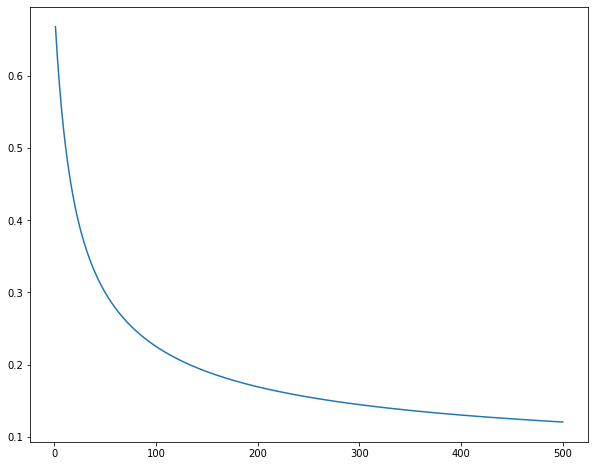

In [5]:
learning_rate = 0.001
n_iters = 500
threshold = 0.5
model = LogisticRegressionMini(learning_rate=learning_rate, n_iters=n_iters,threshold=threshold)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#accuracy = accuracy_score(Y_test, y_pred)
#print("Accuracy:", accuracy)
model.plot_cost()
accuracy(X_test, y_test, model.weights, model.bias)